In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')


In [8]:
df_users = pd.read_csv('user_snapshots.csv')

df_users = df_users[df_users['marketId'] != '0x8472a9a7632b173c8cf3a86d3afec50c35548e76']

In [10]:
df_users = df_users.sort_values(by=['marketId', 'user', 'timestamp'])

In [11]:
def absolute_change(series):
    return series.diff().fillna(series)

def percentage_change(series):
    pct_change = series.pct_change().fillna(1) * 100
    return pct_change.replace([pd.NA, float('inf'), -float('inf')], 100)

In [13]:
df_users['debt_change'] = df_users.groupby(['marketId', 'user'], group_keys=False)['debt'].apply(absolute_change)
df_users['debt_change_pct'] = df_users.groupby(['marketId', 'user'], group_keys=False)['debt'].apply(percentage_change)

In [14]:
df_users

,user,marketId,activeBand,collateral,stablecoin,oraclePrice,collateralUsd,depositedCollateral,debt,n,...,softLiq,timestamp,market_collateral_address,collateralName,rate,totalDebt,nLoans,snapshot_oraclePrice,debt_change,debt_change_pct
140693,0x0027c200949943a923762f737763aec83f701c79,0x100daa78fc509db39ef7d04de0c1abd299f4c6ce,8,20.000000,0.0,1904.921927,38098.438547,20.000000,32636.038216,4,...,False,1692331487,0x7f39c581f595b53c5cb19bd0b3f8da6c935e2ca0,wstETH,0.000991,4.397213e+07,344,1904.921927,32636.038216,100.000000
140692,0x0027c200949943a923762f737763aec83f701c79,0x100daa78fc509db39ef7d04de0c1abd299f4c6ce,8,20.000000,0.0,1919.514539,38390.290774,20.000000,32636.048902,4,...,False,1692345887,0x7f39c581f595b53c5cb19bd0b3f8da6c935e2ca0,wstETH,0.000693,4.368184e+07,346,1919.514539,0.010687,0.000033
140691,0x0027c200949943a923762f737763aec83f701c79,0x100daa78fc509db39ef7d04de0c1abd299f4c6ce,8,20.000000,0.0,1915.005943,38300.118868,20.000000,32636.059584,4,...,False,1692360143,0x7f39c581f595b53c5cb19bd0b3f8da6c935e2ca0,wstETH,0.000742,4.458268e+07,347,1915.005943,0.010682,0.000033
140690,0x0027c200949943a923762f737763aec83f701c79,0x100daa78fc509db39ef7d04de0c1abd299f4c6ce,9,20.000000,0.0,1887.365709,37747.314171,20.000000,32636.070855,4,...,False,1692374579,0x7f39c581f595b53c5cb19bd0b3f8da6c935e2ca0,wstETH,0.000794,4.511078e+07,348,1887.365709,0.011271,0.000035
140689,0x0027c200949943a923762f737763aec83f701c79,0x100daa78fc509db39ef7d04de0c1abd299f4c6ce,9,20.000000,0.0,1885.399325,37707.986507,20.000000,32636.082688,4,...,False,1692389159,0x7f39c581f595b53c5cb19bd0b3f8da6c935e2ca0,wstETH,0.000774,4.502154e+07,349,1885.399325,0.011833,0.000036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438242,0xfb72ed826d1a8a1e82e4dfbcd6a4efc8d99142c7,0xec0820efafc41d8943ee8de495fc9ba8495b15cf,-2,22.111279,0.0,1736.969481,38406.616738,22.111279,15056.281533,10,...,False,1696394219,0xac3e018457b222d93114458476f3e3416abbe38f,sfrxETH,0.051206,1.000709e+07,59,1736.969481,0.702023,0.004663
439062,0xfb72ed826d1a8a1e82e4dfbcd6a4efc8d99142c7,0xec0820efafc41d8943ee8de495fc9ba8495b15cf,-2,22.111279,0.0,1737.792892,38424.823403,22.111279,15056.614392,10,...,False,1696408175,0xac3e018457b222d93114458476f3e3416abbe38f,sfrxETH,0.051206,1.000731e+07,59,1737.792892,0.332859,0.002211
439882,0xfb72ed826d1a8a1e82e4dfbcd6a4efc8d99142c7,0xec0820efafc41d8943ee8de495fc9ba8495b15cf,-2,22.111279,0.0,1742.141324,38520.972796,22.111279,15056.949254,10,...,False,1696422215,0xac3e018457b222d93114458476f3e3416abbe38f,sfrxETH,0.051206,1.000754e+07,59,1742.141324,0.334862,0.002224
440702,0xfb72ed826d1a8a1e82e4dfbcd6a4efc8d99142c7,0xec0820efafc41d8943ee8de495fc9ba8495b15cf,0,22.111279,0.0,1728.304160,38215.015410,22.111279,15057.308730,10,...,False,1696437287,0xac3e018457b222d93114458476f3e3416abbe38f,sfrxETH,0.051206,1.000777e+07,59,1728.304160,0.359476,0.002387


In [23]:
df_actions = df_users[abs(df_users['debt_change_pct']) > 0.1].copy()
df_actions

,user,marketId,activeBand,collateral,stablecoin,oraclePrice,collateralUsd,depositedCollateral,debt,n,...,softLiq,timestamp,market_collateral_address,collateralName,rate,totalDebt,nLoans,snapshot_oraclePrice,debt_change,debt_change_pct
140693,0x0027c200949943a923762f737763aec83f701c79,0x100daa78fc509db39ef7d04de0c1abd299f4c6ce,8,20.000000,0.000000,1904.921927,38098.438547,20.000000,32636.038216,4,...,False,1692331487,0x7f39c581f595b53c5cb19bd0b3f8da6c935e2ca0,wstETH,0.000991,4.397213e+07,344,1904.921927,32636.038216,100.000000
140646,0x0027c200949943a923762f737763aec83f701c79,0x100daa78fc509db39ef7d04de0c1abd299f4c6ce,11,19.887191,0.000000,1876.570376,37319.714108,20.000000,32466.332249,4,...,False,1693225943,0x7f39c581f595b53c5cb19bd0b3f8da6c935e2ca0,wstETH,0.025121,6.347821e+07,416,1876.570376,-183.587763,-0.562292
357221,0x0027c200949943a923762f737763aec83f701c79,0x100daa78fc509db39ef7d04de0c1abd299f4c6ce,11,19.782302,0.000000,1857.979001,36755.101651,20.000000,29294.571503,4,...,False,1693916807,0x7f39c581f595b53c5cb19bd0b3f8da6c935e2ca0,wstETH,0.047287,5.824104e+07,412,1857.979001,-3200.666308,-9.849647
513382,0x0027c200949943a923762f737763aec83f701c79,0x100daa78fc509db39ef7d04de0c1abd299f4c6ce,2,10.752858,14508.113069,2039.915753,21934.924280,20.000000,32916.638523,4,...,True,1698163235,0x7f39c581f595b53c5cb19bd0b3f8da6c935e2ca0,wstETH,0.082202,5.178010e+07,398,2039.915753,3401.067682,11.522961
515089,0x0027c200949943a923762f737763aec83f701c79,0x100daa78fc509db39ef7d04de0c1abd299f4c6ce,2,10.940115,13962.902925,2045.305699,22375.879458,20.000000,29519.945761,4,...,True,1698206435,0x7f39c581f595b53c5cb19bd0b3f8da6c935e2ca0,wstETH,0.080861,4.946211e+07,396,2045.305699,-3398.019724,-10.322691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436652,0xf9a2fa22cb7df26e3a10622c696f37fc345c6239,0xec0820efafc41d8943ee8de495fc9ba8495b15cf,-2,66.965971,0.000000,1760.371302,117884.973684,66.965971,100951.675762,10,...,False,1696320227,0xac3e018457b222d93114458476f3e3416abbe38f,sfrxETH,0.049920,9.105985e+06,58,1760.371302,4002.486838,4.128438
500082,0xf9a2fa22cb7df26e3a10622c696f37fc345c6239,0xec0820efafc41d8943ee8de495fc9ba8495b15cf,2,51.590447,23077.267532,1703.170011,87867.301924,66.965971,97903.657322,10,...,True,1697835551,0xac3e018457b222d93114458476f3e3416abbe38f,sfrxETH,0.054519,9.454757e+06,61,1703.170011,-3366.538532,-3.324313
514498,0xf9a2fa22cb7df26e3a10622c696f37fc345c6239,0xec0820efafc41d8943ee8de495fc9ba8495b15cf,-8,42.477461,0.000000,1886.223306,80121.977459,44.796399,56952.849599,50,...,False,1698179579,0xac3e018457b222d93114458476f3e3416abbe38f,sfrxETH,0.078069,9.264056e+06,66,1886.223306,-41013.592392,-41.864940
37093,0xf9a2fa22cb7df26e3a10622c696f37fc345c6239,0xec0820efafc41d8943ee8de495fc9ba8495b15cf,-24,61.761531,0.000000,2216.151186,136872.891239,64.080470,97557.682481,50,...,False,1699632035,0xac3e018457b222d93114458476f3e3416abbe38f,sfrxETH,0.072266,1.316236e+07,79,2216.151186,40429.404191,70.769513


In [24]:
user_action_counts = df_actions.groupby(['marketId', 'user']).size().reset_index(name='action_count')
market_action_distribution = user_action_counts.groupby(['marketId', 'action_count']).size().reset_index(name='user_count')
markets = market_action_distribution['marketId'].unique()

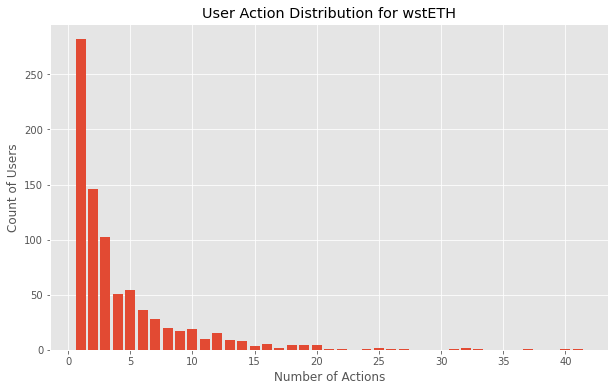

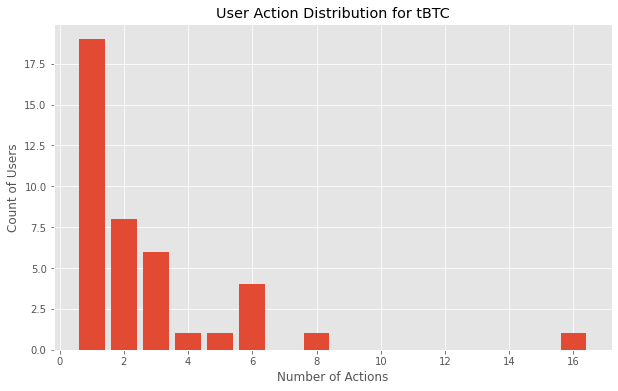

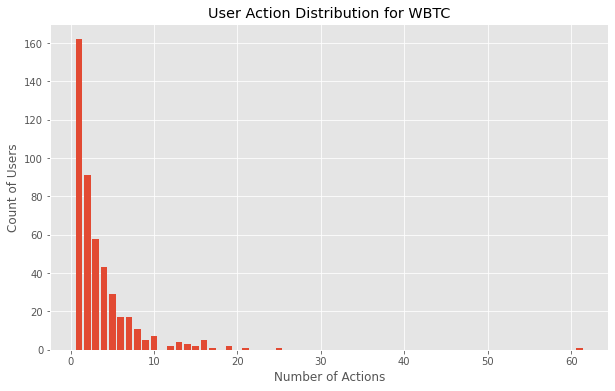

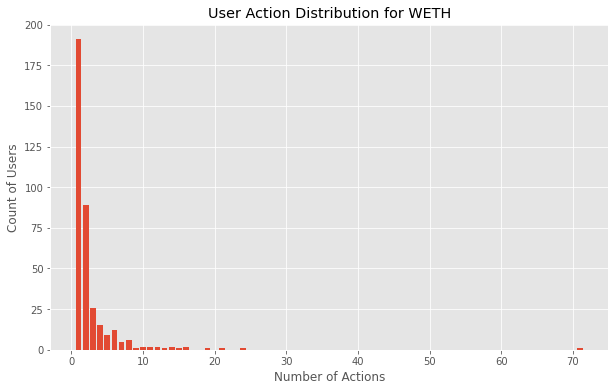

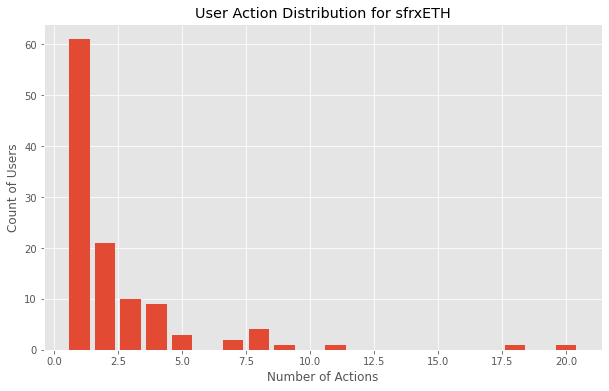

In [25]:
for market in markets:
    # Filter data for the market
    market_data = market_action_distribution[market_action_distribution['marketId'] == market]
    collat = list(df_users[df_users['marketId']==market]['collateralName'])[0]

    # Create plot
    plt.figure(figsize=(10, 6))
    plt.bar(market_data['action_count'], market_data['user_count'])

    # Set plot title and labels
    plt.title(f'User Action Distribution for {collat}')
    plt.xlabel('Number of Actions')
    plt.ylabel('Count of Users')
    
    # Show plot
    plt.show()

In [26]:
df_actions[df_actions['debt_change'] < 0]

,user,marketId,activeBand,collateral,stablecoin,oraclePrice,collateralUsd,depositedCollateral,debt,n,...,softLiq,timestamp,market_collateral_address,collateralName,rate,totalDebt,nLoans,snapshot_oraclePrice,debt_change,debt_change_pct
140646,0x0027c200949943a923762f737763aec83f701c79,0x100daa78fc509db39ef7d04de0c1abd299f4c6ce,11,19.887191,0.000000,1876.570376,37319.714108,20.000000,32466.332249,4,...,False,1693225943,0x7f39c581f595b53c5cb19bd0b3f8da6c935e2ca0,wstETH,0.025121,6.347821e+07,416,1876.570376,-183.587763,-0.562292
357221,0x0027c200949943a923762f737763aec83f701c79,0x100daa78fc509db39ef7d04de0c1abd299f4c6ce,11,19.782302,0.000000,1857.979001,36755.101651,20.000000,29294.571503,4,...,False,1693916807,0x7f39c581f595b53c5cb19bd0b3f8da6c935e2ca0,wstETH,0.047287,5.824104e+07,412,1857.979001,-3200.666308,-9.849647
515089,0x0027c200949943a923762f737763aec83f701c79,0x100daa78fc509db39ef7d04de0c1abd299f4c6ce,2,10.940115,13962.902925,2045.305699,22375.879458,20.000000,29519.945761,4,...,True,1698206435,0x7f39c581f595b53c5cb19bd0b3f8da6c935e2ca0,wstETH,0.080861,4.946211e+07,396,2045.305699,-3398.019724,-10.322691
39588,0x0027c200949943a923762f737763aec83f701c79,0x100daa78fc509db39ef7d04de0c1abd299f4c6ce,-11,14.577920,19804.912800,2342.603579,34150.287874,26.340000,43496.737050,4,...,True,1699678451,0x7f39c581f595b53c5cb19bd0b3f8da6c935e2ca0,wstETH,0.075396,6.692534e+07,412,2342.603579,-4897.478043,-10.119966
222496,0x002c2bd39ba80cf12c761edae0c949f8ba21e76b,0x100daa78fc509db39ef7d04de0c1abd299f4c6ce,-3,0.875523,197.273844,2140.164084,1873.762882,0.969680,1797.607915,4,...,True,1687666799,0x7f39c581f595b53c5cb19bd0b3f8da6c935e2ca0,wstETH,0.092606,2.917403e+07,239,2140.164084,-29.848148,-1.633317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529512,0xc0671f93291fc53b26d4127bd8fc5f37a3e6b7ab,0xec0820efafc41d8943ee8de495fc9ba8495b15cf,-8,5.220795,0.000000,1896.084329,9899.067678,5.220795,7586.180875,12,...,False,1698509387,0xac3e018457b222d93114458476f3e3416abbe38f,sfrxETH,0.082807,8.886699e+06,76,1896.084329,-516.326882,-6.372433
354692,0xf34b1bf36728dbee1ab4737134a6133680eaaa08,0xec0820efafc41d8943ee8de495fc9ba8495b15cf,0,519.267109,0.000000,1723.218843,894810.866549,519.267109,453284.474130,10,...,False,1693828811,0xac3e018457b222d93114458476f3e3416abbe38f,sfrxETH,0.045759,7.815759e+06,44,1723.218843,-249748.150661,-35.524404
363712,0xf34b1bf36728dbee1ab4737134a6133680eaaa08,0xec0820efafc41d8943ee8de495fc9ba8495b15cf,0,269.267109,0.000000,1720.342480,463231.646132,269.267109,252239.865332,10,...,False,1694103551,0xac3e018457b222d93114458476f3e3416abbe38f,sfrxETH,0.045630,7.555677e+06,47,1720.342480,-201210.604506,-44.373227
500082,0xf9a2fa22cb7df26e3a10622c696f37fc345c6239,0xec0820efafc41d8943ee8de495fc9ba8495b15cf,2,51.590447,23077.267532,1703.170011,87867.301924,66.965971,97903.657322,10,...,True,1697835551,0xac3e018457b222d93114458476f3e3416abbe38f,sfrxETH,0.054519,9.454757e+06,61,1703.170011,-3366.538532,-3.324313


In [35]:
df_actions[df_actions['marketId'] == '0x100daa78fc509db39ef7d04de0c1abd299f4c6ce']['debt_change_pct'].describe()

count    3.591000e+03
mean     4.344798e+05
std      2.600798e+07
min     -1.000000e+02
25%     -2.411578e+00
50%      7.297366e+00
75%      1.000000e+02
max      1.558527e+09
Name: debt_change_pct, dtype: float64

In [89]:
df = df_actions.copy()


In [97]:

def define_bins(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    non_outliers = series[(series >= lower_bound) & (series <= upper_bound) & (series <= 100)]
    bins = list(
        np.linspace(non_outliers.min(), non_outliers.max(), 9).tolist()
    )
    bins.append(series.max())
    labels_dict: dict[str, int] = {}
    for left, right, count in zip(bins[:-1], bins[1:], counts):
        if right > 100:
            label = '100+'
        else:
            label = f"{left:.2f}% - {right:.2f}%"
        labels_dict[label] = count
    return labels_dict


In [98]:

# Apply this function to the debt_change_pct column for each market
market_bins = {}
for market in df['collateralName'].unique():
    market_series = df[df['collateralName'] == market]['debt_change_pct']
    print(market_series)
    print(define_bins(market_series))
    market_bins[market] = define_bins(market_series)
market_bins

140693    100.000000
140646     -0.562292
357221     -9.849647
513382     11.522961
515089    -10.322691
             ...    
253390     -2.662737
525758     -0.121687
43013     125.715519
45073      -4.748632
60810      -7.064064
Name: debt_change_pct, Length: 3591, dtype: float64
{'-100.00% - -75.00%': 18, '-75.00% - -50.00%': 25, '-50.00% - -25.00%': 36, '-25.00% - 0.00%': 368, '0.00% - 25.00%': 429, '25.00% - 50.00%': 113, '50.00% - 75.00%': 60, '75.00% - 100.00%': 42, '100+': 558}
511649    100.000000
403873    100.000000
427836     11.969279
508722     15.842981
76168      20.971364
             ...    
7196      100.000000
70000     100.000000
462176    100.000000
468892     -4.989021
493499     -3.662748
Name: debt_change_pct, Length: 110, dtype: float64
{'-99.84% - -74.86%': 18, '-74.86% - -49.88%': 25, '-49.88% - -24.90%': 36, '-24.90% - 0.08%': 368, '0.08% - 25.06%': 429, '25.06% - 50.04%': 113, '50.04% - 75.02%': 60, '75.02% - 100.00%': 42, '100+': 558}
135184    100.000000

{'wstETH': {'-100.00% - -75.00%': 18,
  '-75.00% - -50.00%': 25,
  '-50.00% - -25.00%': 36,
  '-25.00% - 0.00%': 368,
  '0.00% - 25.00%': 429,
  '25.00% - 50.00%': 113,
  '50.00% - 75.00%': 60,
  '75.00% - 100.00%': 42,
  '100+': 558},
 'tBTC': {'-99.84% - -74.86%': 18,
  '-74.86% - -49.88%': 25,
  '-49.88% - -24.90%': 36,
  '-24.90% - 0.08%': 368,
  '0.08% - 25.06%': 429,
  '25.06% - 50.04%': 113,
  '50.04% - 75.02%': 60,
  '75.02% - 100.00%': 42,
  '100+': 558},
 'WBTC': {'-100.00% - -75.00%': 18,
  '-75.00% - -50.00%': 25,
  '-50.00% - -25.00%': 36,
  '-25.00% - 0.00%': 368,
  '0.00% - 25.00%': 429,
  '25.00% - 50.00%': 113,
  '50.00% - 75.00%': 60,
  '75.00% - 100.00%': 42,
  '100+': 558},
 'WETH': {'-100.00% - -75.00%': 18,
  '-75.00% - -50.00%': 25,
  '-50.00% - -25.00%': 36,
  '-25.00% - 0.00%': 368,
  '0.00% - 25.00%': 429,
  '25.00% - 50.00%': 113,
  '50.00% - 75.00%': 60,
  '75.00% - 100.00%': 42,
  '100+': 558},
 'sfrxETH': {'-100.00% - -75.00%': 18,
  '-75.00% - -50.00%': 2

In [85]:
market_series = df[df['collateralName'] == 'WBTC']['debt_change_pct']
market_series

135184    100.000000
135182     30.000417
379980     30.728782
402394      3.134614
47753      37.734882
             ...    
172007    244.408445
171987      1.002298
171985     -2.709534
171975     -8.539672
81564     100.000000
Name: debt_change_pct, Length: 1649, dtype: float64

In [86]:
Q1 = market_series.quantile(0.25)
Q3 = market_series.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

non_outliers = market_series[(market_series >= lower_bound) & (market_series <= upper_bound) & (market_series <= 100)]

In [87]:
bins = list(
    np.linspace(non_outliers.min(), non_outliers.max(), 9).tolist()
)
bins.append(market_series.max())
counts, bins = np.histogram(market_series, bins=bins)
counts

array([ 18,  25,  36, 368, 429, 113,  60,  42, 558])

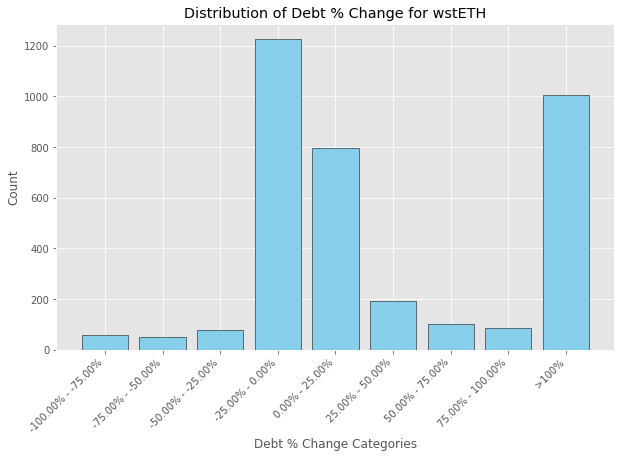

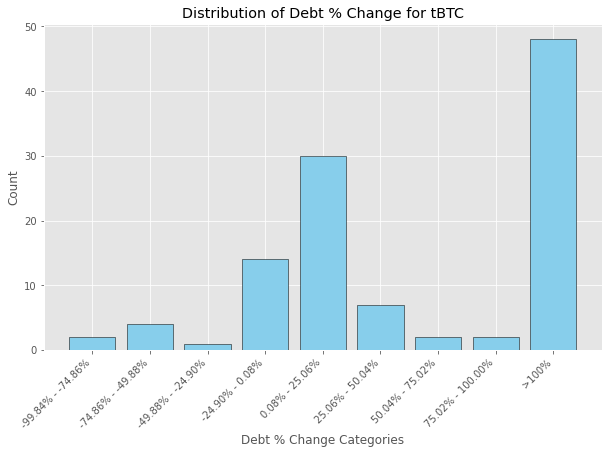

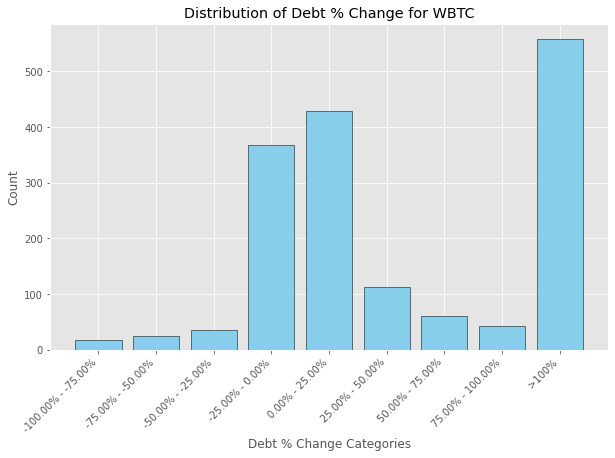

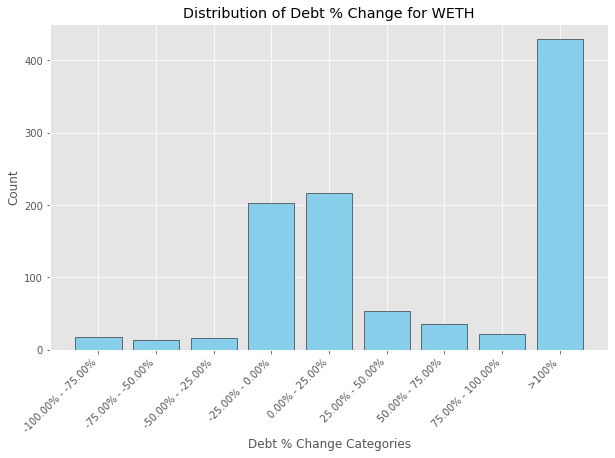

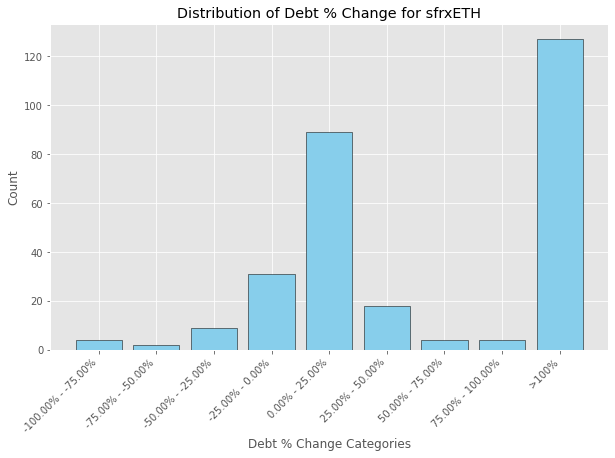

In [100]:
def define_bins(series):
    # Quantiles and IQR
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Non-outliers within the 100% limit
    non_outliers = series[(series >= lower_bound) & (series <= upper_bound) & (series <= 100)]

    # Bins: split non-outliers into 9 bins, add max value for >100% bin
    bins = np.linspace(non_outliers.min(), non_outliers.max(), 9).tolist()
    if series.max() > 100:
        bins.append(series.max())

    return bins

# Apply this function to the debt_change_pct column for each market
market_bins = {}
for market in df['collateralName'].unique():
    market_series = df[df['collateralName'] == market]['debt_change_pct']
    market_bins[market] = define_bins(market_series)

for market in df['collateralName'].unique():
    market_data = df[df['collateralName'] == market]['debt_change_pct']
    bins = market_bins[market]

    # Skip if there's insufficient data
    if len(bins) < 2:
        print(f"Skipping market {market} due to insufficient data")
        continue

    plt.figure(figsize=(10, 6))
    counts, bins = np.histogram(market_data, bins=bins)
    plt.bar(range(len(counts)), counts, edgecolor='black', color='skyblue')

    # Create bin labels
    bin_labels = [f"{bins[i]:.2f}% - {bins[i+1]:.2f}%" for i in range(len(bins)-1)]
    if bins[-1] > 100:
        bin_labels[-1] = ">100%"

    plt.title(f'Distribution of Debt % Change for {market}')
    plt.xlabel('Debt % Change Categories')
    plt.ylabel('Count')
    plt.xticks(range(len(bin_labels)), labels=bin_labels, rotation=45, ha='right')

    plt.show()